___

<a href='https://mainacademy.ua/'> <img src='https://mainacademy.ua/wp-content/uploads/2019/03/logo-main.png' alt = 'Хмм, щось з інтернетом'/></a>
___

# Module 8: Unsupervised learning

## Lab work 8



#### Мета: 

* навчитися використовувати моделі без учителем

### Завдання 1:

Опрацюйте файл `Groceries.csv`. Використовуючи алгоритм асоціативних зв'язків, знайдіть:

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import itertools

In [3]:
groceries_data = pd.read_csv(r'C:\Users\andre\Documents\GitHub\DS_7\Lab 8\groceries.csv')

1. зробіть описову статистику даного файлу

In [4]:
groceries_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9835 entries, 0 to 9834
Data columns (total 33 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Item(s)  9835 non-null   int64 
 1   Item 1   9835 non-null   object
 2   Item 2   7676 non-null   object
 3   Item 3   6033 non-null   object
 4   Item 4   4734 non-null   object
 5   Item 5   3729 non-null   object
 6   Item 6   2874 non-null   object
 7   Item 7   2229 non-null   object
 8   Item 8   1684 non-null   object
 9   Item 9   1246 non-null   object
 10  Item 10  896 non-null    object
 11  Item 11  650 non-null    object
 12  Item 12  468 non-null    object
 13  Item 13  351 non-null    object
 14  Item 14  273 non-null    object
 15  Item 15  196 non-null    object
 16  Item 16  141 non-null    object
 17  Item 17  95 non-null     object
 18  Item 18  66 non-null     object
 19  Item 19  52 non-null     object
 20  Item 20  38 non-null     object
 21  Item 21  29 non-null     object
 22  

In [5]:
groceries_data.describe()

,Item(s)
count,9835.000000
mean,4.409456
std,3.589385
min,1.000000
25%,2.000000
50%,3.000000
75%,6.000000
max,32.000000


2. ведіть топ-3 продукти, що продаються

In [6]:
# Складаємо всі куплені продукти в один масив
saled_products = groceries_data.drop(columns=['Item(s)']).values.reshape(-1)
saled_products = pd.Series(saled_products).dropna()

# вираховуємо к-сть продажів та частоту купівлі продуктів
products_data = pd.DataFrame(saled_products.value_counts().reset_index())
products_data.columns = ['product', 'count']
products_data['support'] = (products_data['count'] / len(groceries_data)).round(4)

products_data.head(3)

,product,count,support
0,whole milk,2513,0.2555
1,other vegetables,1903,0.1935
2,rolls/buns,1809,0.1839


3. виведіть топ-2 пари продуктів, що продаються

In [7]:
def products_list_sales(products : tuple) -> int:
    """ Повертає к-сть замовлень, де куплені всі продукти зі списку"""
    
    prods_in_orders = groceries_data.isin(products).sum(axis=1)
    return (prods_in_orders == len(products)).sum()

In [88]:
prod_pairs = pd.Series(itertools.combinations(products_data['product'], 2))

pair_sales = pd.DataFrame(prod_pairs, columns=['products pairs'])
pair_sales['sales num'] = pair_sales['products pairs'].apply(products_list_sales).sort_values(ascending=False)
pair_sales['support'] = (pair_sales['sales num'] / len(groceries_data)).round(4)

pair_sales.head(2)

,products pairs,sales num,support
0,"(whole milk, other vegetables)",736,0.0748
1,"(whole milk, rolls/buns)",557,0.0566


Оскільки підрахунки займають велику к-сть часу, записуємо результати в csv файл

In [90]:
pair_sales.to_csv('products pairs sales.csv', index=False, sep=';')

4. придумайте, як отриману інформацію можна використатти (опишіть в 3-4 реченнях)

Здійснені підрахунки допомагають отримати бачення, які продукти користуються більшим попитом. Це дозволяє збільшити прибутки компанії різними методами маркетингу, наприклад реклами чи акцій, збільшення чи зменшення цін на товари з різною популярністю. Розставляти пріорітети в доставках, які продукти повинні бути завжди на полицях, а які можуть почекати.  
Інформація про пари продуктів, що купуються найчастіше допомагає нам зрозуміти, які товари пропонувати разом та мають бути в наявності.

### Завдання 2:

Завантажте файл https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python 

In [8]:
mall_customers = pd.read_csv('Mall_Customers.csv', index_col=0)
mall_customers

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


1. Спробуйте провести кластеризацію, тобто виділити цільові групи, для яких можна впроваджувати певні маркетингові акції

In [ ]:
from sklearn.cluster import KMeans

X = mall_customers.iloc[:, 2:]

Виводимо графік з інерціями різної к-сті кластерів для пошуку найоптимальнішого

<AxesSubplot:>

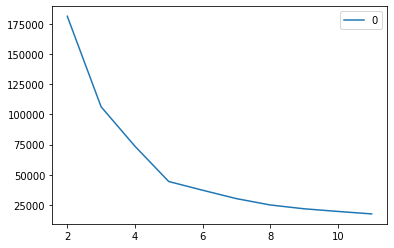

In [15]:
inertias = []
for n in range(2, 12):
    kmeans = KMeans(random_state=0, n_clusters=n)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

pd.DataFrame(inertias, index=range(2, 12)).plot()

c:\users\andre\appdata\local\programs\python\python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

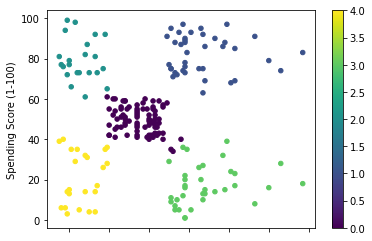

In [113]:
kmeans = KMeans(n_clusters=5)
y_kmeans = kmeans.fit_predict(X)

X.plot.scatter(0, 1, c=y_kmeans, s=20, cmap='viridis')

2. Опишіть отримані результати

Провівши кластеризацію по доходах громадян та їхніх витратах ми можемо визначити платеспроможність кожної групи, запропонувати спеціальні пропозиції